### Import the required libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import re, nltk, spacy, string
#nltk.download()
import en_core_web_sm
nlp = en_core_web_sm.load()

import warnings
warnings.filterwarnings("ignore")


/Users/personal/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Lets import the data

In [3]:
df = pd.read_csv("/Users/personal/Downloads/Amazon Clothing reviews/data_amazon.xlsx - Sheet1.csv")

In [4]:
df.head()

,Title,Review,Cons_rating,Cloth_class,Materials,Construction,Color,Finishing,Durability
0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,Intimates,0.0,0.0,0.0,1.0,0.0
1,NaN,Love this dress! it's sooo pretty. i happene...,5.0,Dresses,0.0,1.0,0.0,0.0,0.0
2,Some major design flaws,I had such high hopes for this dress and reall...,3.0,Dresses,0.0,0.0,0.0,1.0,0.0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,Pants,0.0,0.0,0.0,0.0,0.0
4,Flattering shirt,This shirt is very flattering to all due to th...,5.0,Blouses,0.0,1.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49338 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45373 non-null  object 
 1   Review        48509 non-null  object 
 2   Cons_rating   49124 non-null  float64
 3   Cloth_class   49322 non-null  object 
 4   Materials     5741 non-null   float64
 5   Construction  5743 non-null   float64
 6   Color         5742 non-null   float64
 7   Finishing     5737 non-null   float64
 8   Durability    5734 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [6]:
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48220 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         44972 non-null  object 
 1   Review        48109 non-null  object 
 2   Cons_rating   48007 non-null  float64
 3   Cloth_class   48205 non-null  object 
 4   Materials     5731 non-null   float64
 5   Construction  5733 non-null   float64
 6   Color         5732 non-null   float64
 7   Finishing     5727 non-null   float64
 8   Durability    5724 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [8]:
df_cleared = df[ ~ df.Review.isnull()]

In [9]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48109 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         44927 non-null  object 
 1   Review        48109 non-null  object 
 2   Cons_rating   47897 non-null  float64
 3   Cloth_class   48096 non-null  object 
 4   Materials     5731 non-null   float64
 5   Construction  5733 non-null   float64
 6   Color         5732 non-null   float64
 7   Finishing     5727 non-null   float64
 8   Durability    5724 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [10]:
df_cleared.Cons_rating.fillna(0, inplace=True)

In [11]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48109 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         44927 non-null  object 
 1   Review        48109 non-null  object 
 2   Cons_rating   48109 non-null  float64
 3   Cloth_class   48096 non-null  object 
 4   Materials     5731 non-null   float64
 5   Construction  5733 non-null   float64
 6   Color         5732 non-null   float64
 7   Finishing     5727 non-null   float64
 8   Durability    5724 non-null   float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [12]:
col = ["Materials","Construction","Finishing","Durability","Color"]

fill_values = {'Materials': 0, 'Construction': 0,'Finishing':  0, 'Durability': 0, 'Color': 0}

for c in col:
    df_cleared[c].fillna(fill_values[c], inplace=True)

In [13]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48109 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         44927 non-null  object 
 1   Review        48109 non-null  object 
 2   Cons_rating   48109 non-null  float64
 3   Cloth_class   48096 non-null  object 
 4   Materials     48109 non-null  float64
 5   Construction  48109 non-null  float64
 6   Color         48109 non-null  float64
 7   Finishing     48109 non-null  float64
 8   Durability    48109 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [14]:
df_cleared.Title.isna().sum()

3182

In [15]:
df_cleared.Cloth_class.value_counts()

Dresses           8416
Blouses           5293
Knits             4626
Jeans             3819
Sweaters          3803
Pants             3629
Jackets           3195
Shorts            3071
Sleep             2910
Shirts            2543
Blazer            1620
Suits             1313
Fine gauge        1059
Skirts             903
Lounge             668
Swim               330
Outerwear          319
Legwear            158
Intimates          147
Layering           132
Trend              118
Dress               22
Chemises             1
Casual bottoms       1
Name: Cloth_class, dtype: int64

In [16]:
df_cleared['Cloth_class'].fillna("Dresses", inplace=True)

In [17]:
df_cleared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48109 entries, 0 to 49337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         44927 non-null  object 
 1   Review        48109 non-null  object 
 2   Cons_rating   48109 non-null  float64
 3   Cloth_class   48109 non-null  object 
 4   Materials     48109 non-null  float64
 5   Construction  48109 non-null  float64
 6   Color         48109 non-null  float64
 7   Finishing     48109 non-null  float64
 8   Durability    48109 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [18]:
df_cleared.Cons_rating.value_counts()

5.0    27561
4.0     8062
3.0     5256
1.0     3754
2.0     3264
0.0      212
Name: Cons_rating, dtype: int64

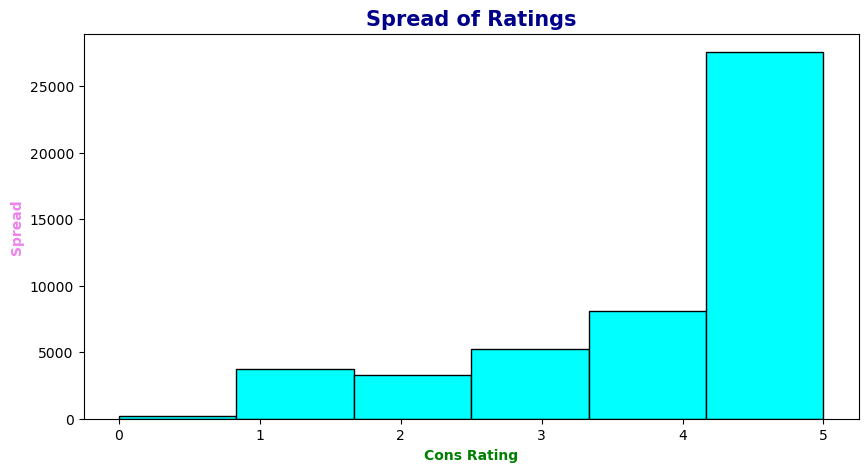

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(df_cleared.Cons_rating, bins = 6, edgecolor='black', color='cyan')
plt.title('Spread of Ratings', fontsize = 15, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Cons Rating', fontsize = 10, fontweight = 'bold', color = 'green')
plt.ylabel('Spread', fontsize = 10, fontweight = 'bold', color = 'violet')
plt.show()

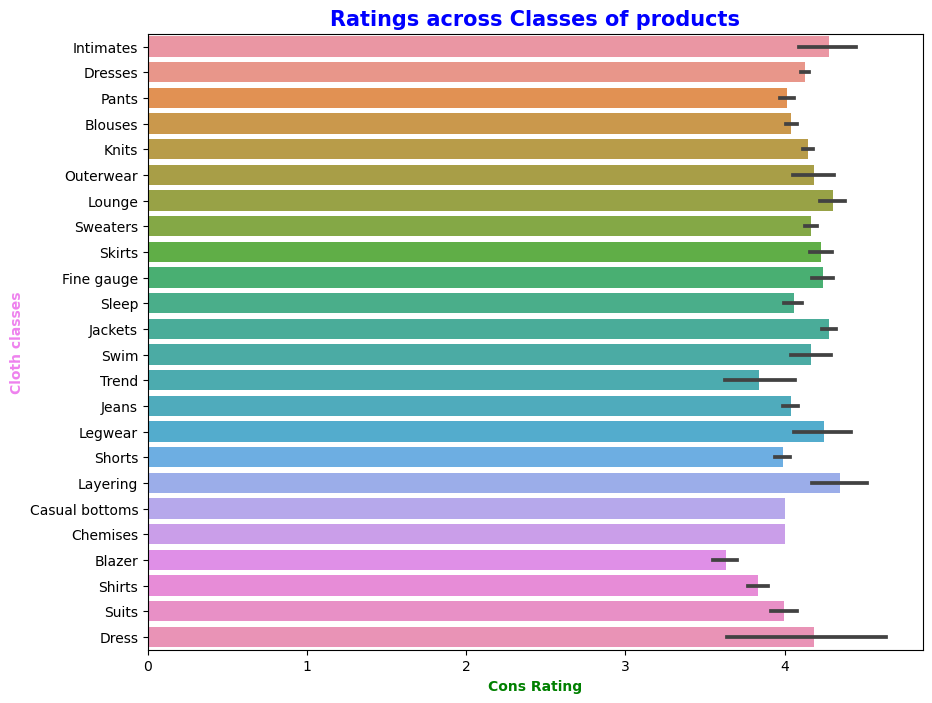

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df_cleared, x='Cons_rating', y='Cloth_class', estimator=np.mean)
plt.title('Ratings across Classes of products', fontsize = 15, fontweight = 'bold', color = 'blue')
plt.xlabel('Cons Rating', fontsize = 10, fontweight = 'bold', color = 'green')
plt.ylabel('Cloth classes', fontsize = 10, fontweight = 'bold', color = 'violet')
plt.show()


<AxesSubplot:>

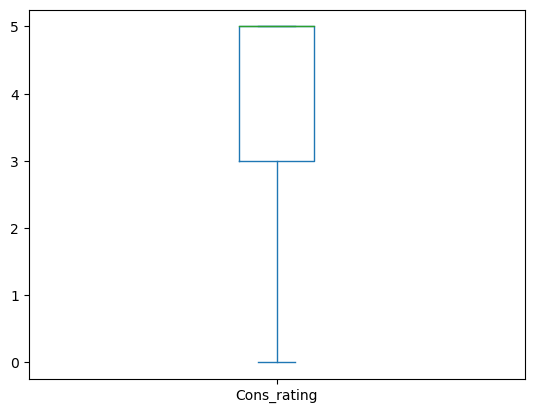

In [21]:
df_cleared.Cons_rating.plot.box()

In [22]:
df_cleared.Cons_rating.describe()

count    48109.000000
mean         4.076223
std          1.311692
min          0.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Cons_rating, dtype: float64

<AxesSubplot:xlabel='Cons_rating'>

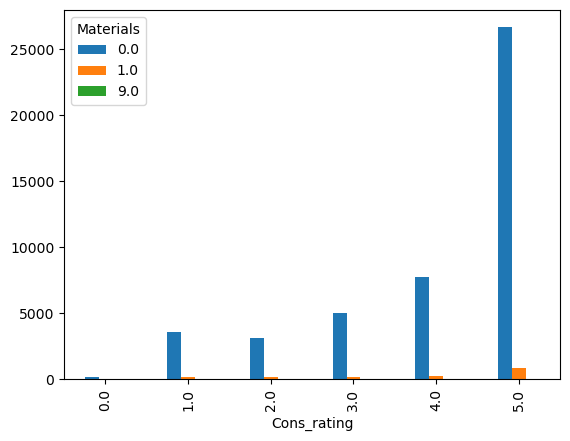

In [23]:
pd.crosstab(index=df_cleared['Cons_rating'],columns=df_cleared['Materials']).plot.bar()

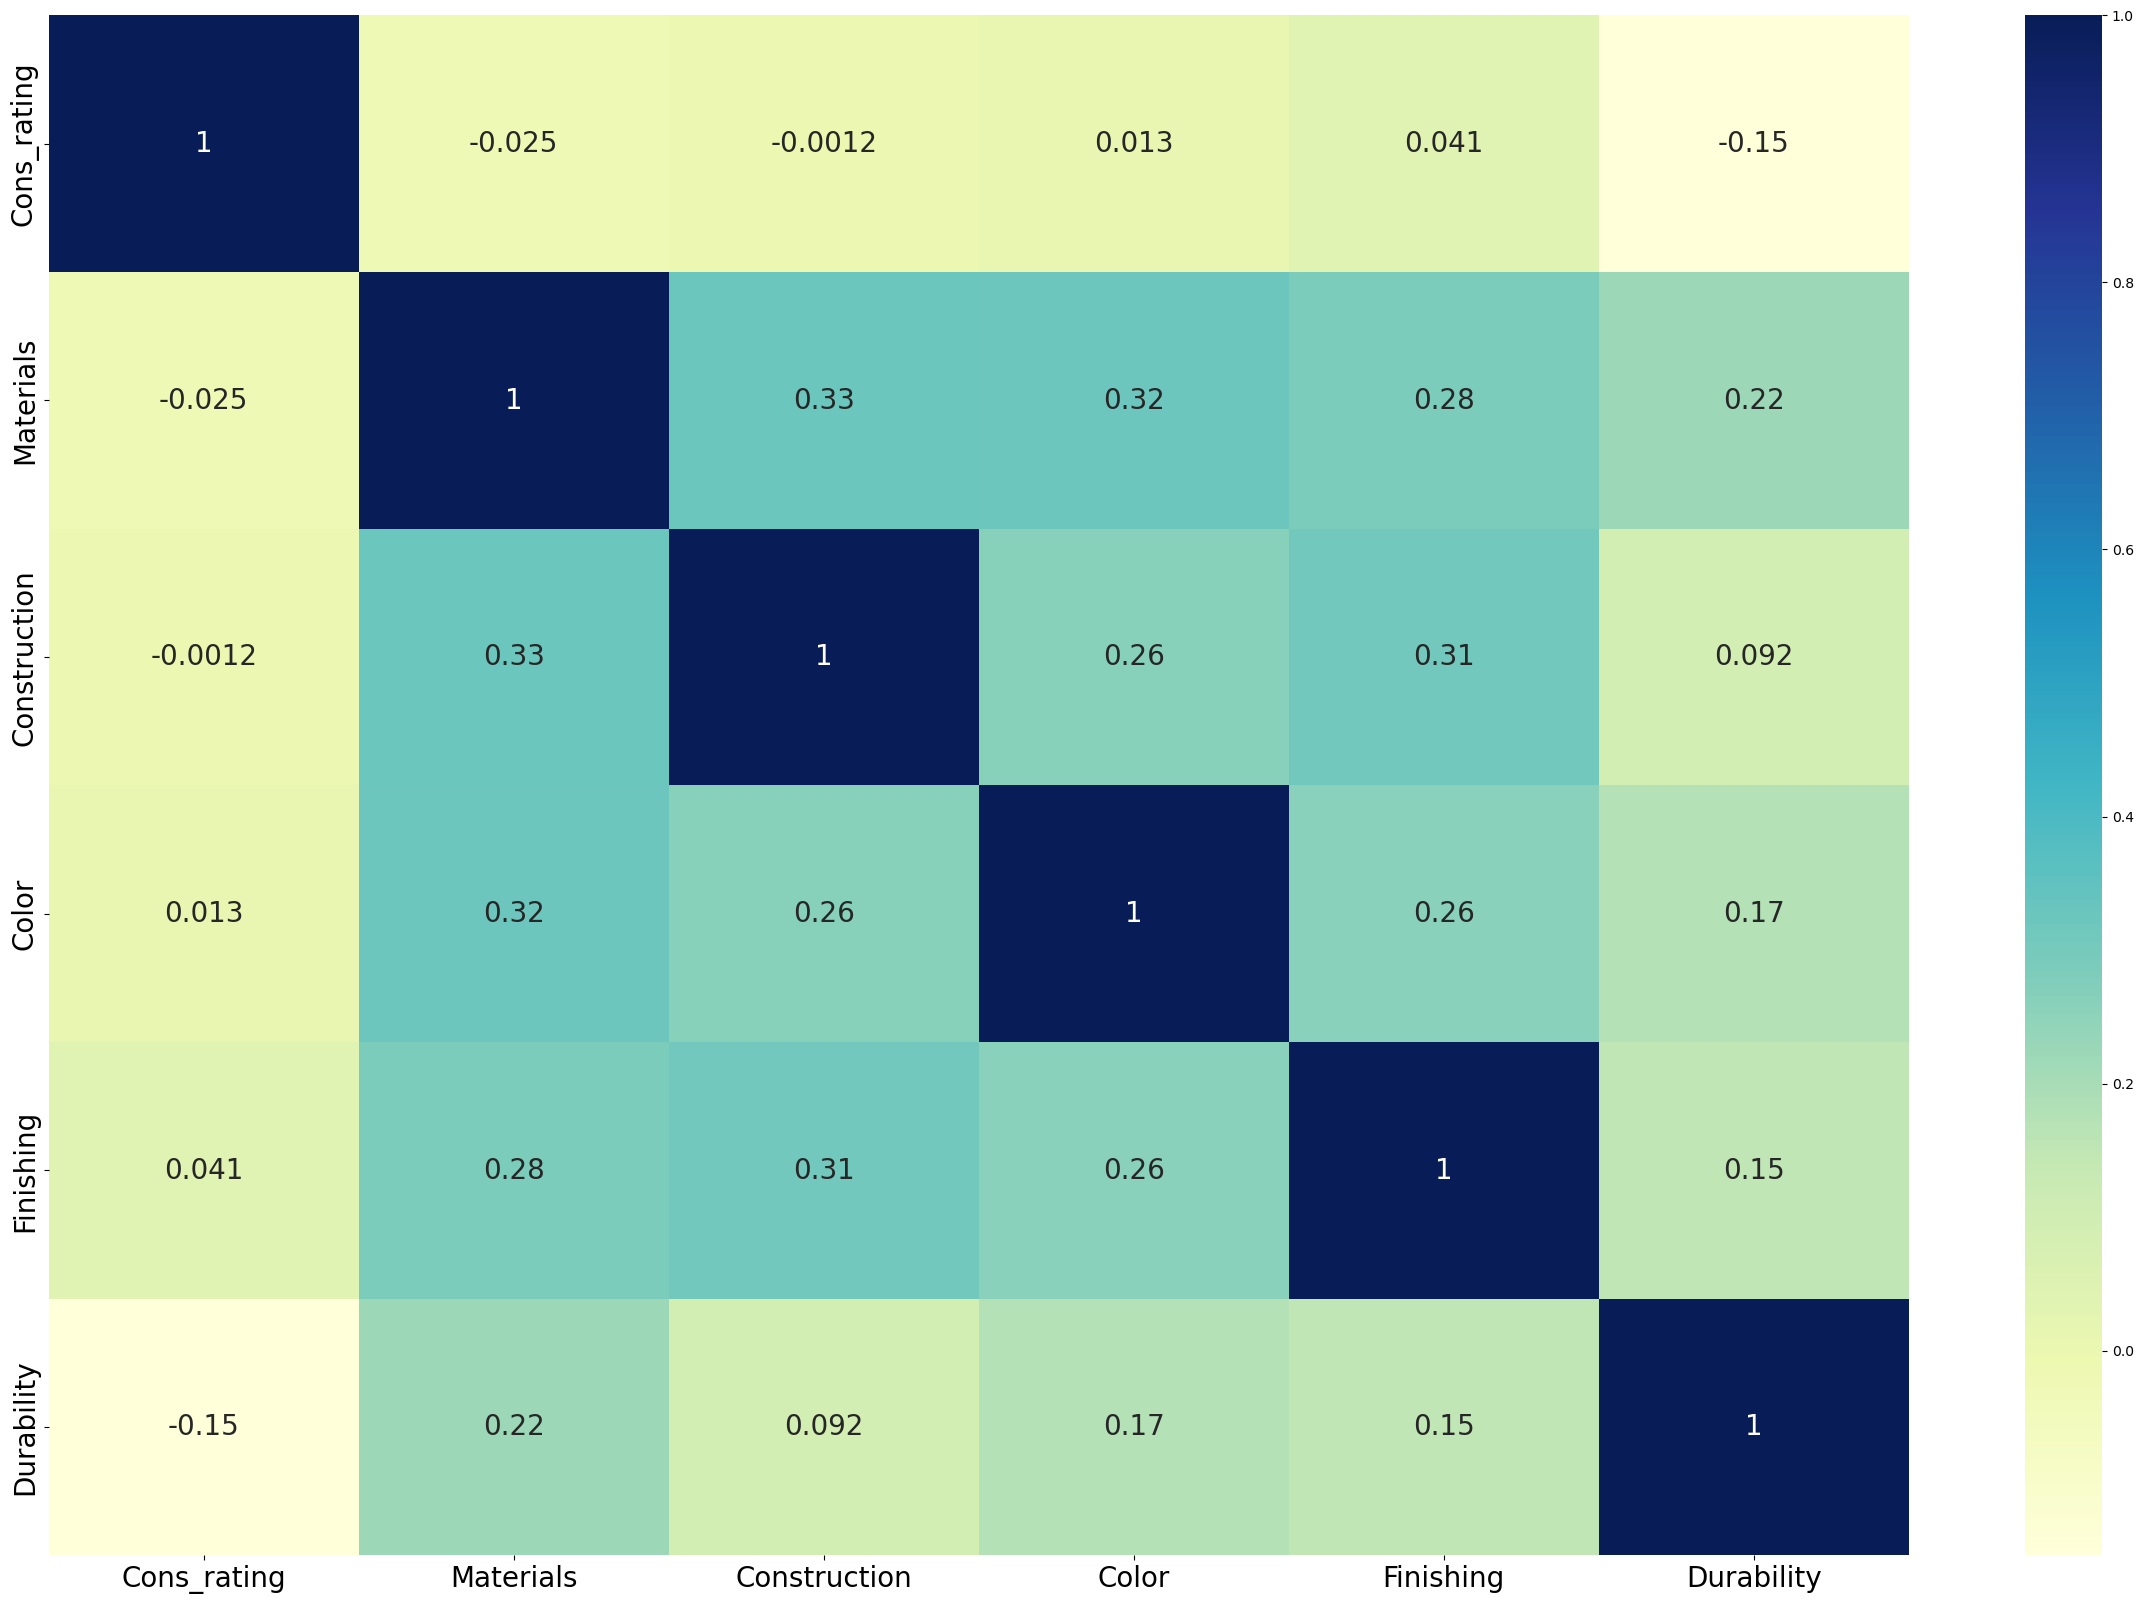

In [24]:
# Let's check the correlation coefficients now. 
plt.figure(figsize = (30, 20))
heat = sns.heatmap(df_cleared.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 20})
heat.set_xticklabels(heat.get_xticklabels(), fontsize=20)
heat.set_yticklabels(heat.get_yticklabels(), fontsize=20)
plt.show()

<Figure size 3000x1600 with 0 Axes>

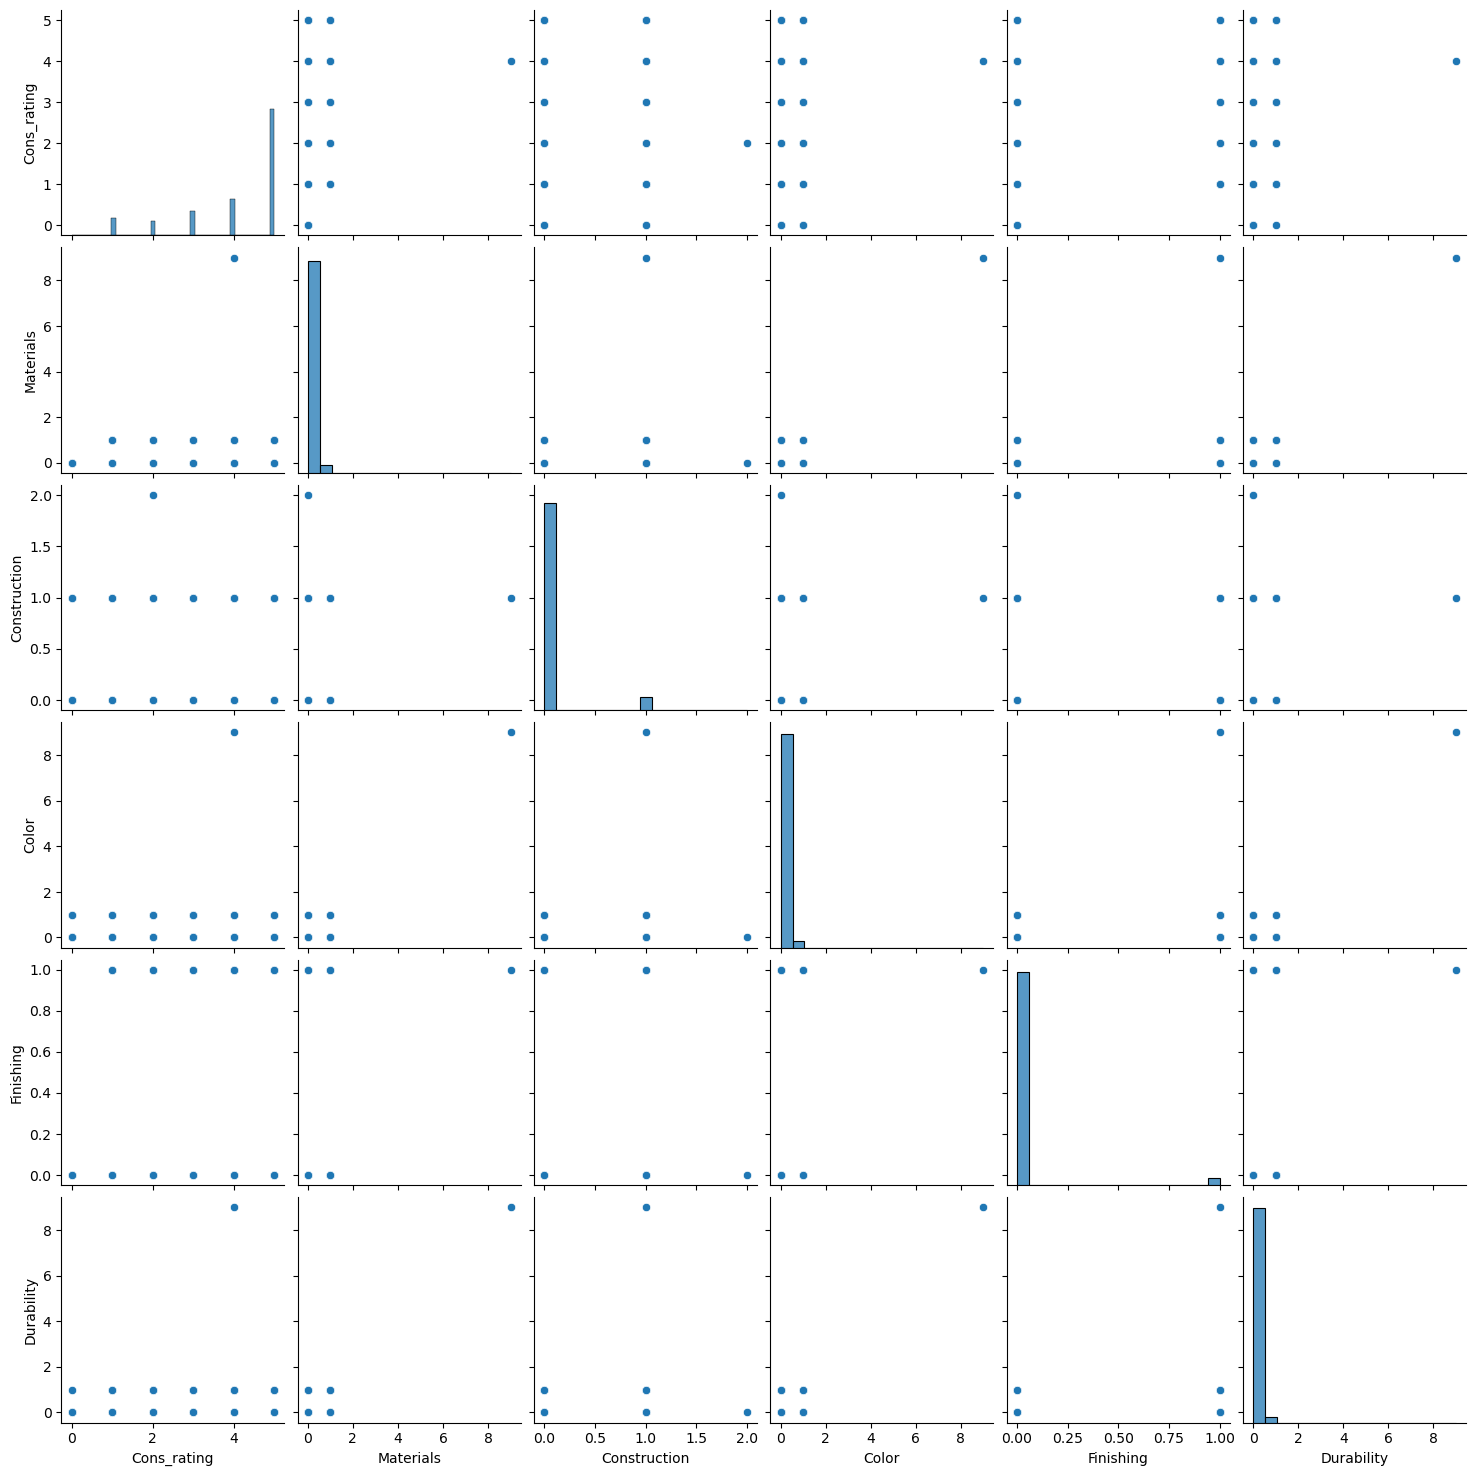

In [25]:
plt.figure(figsize=(30, 16))
sns.pairplot(df_cleared)
plt.show()

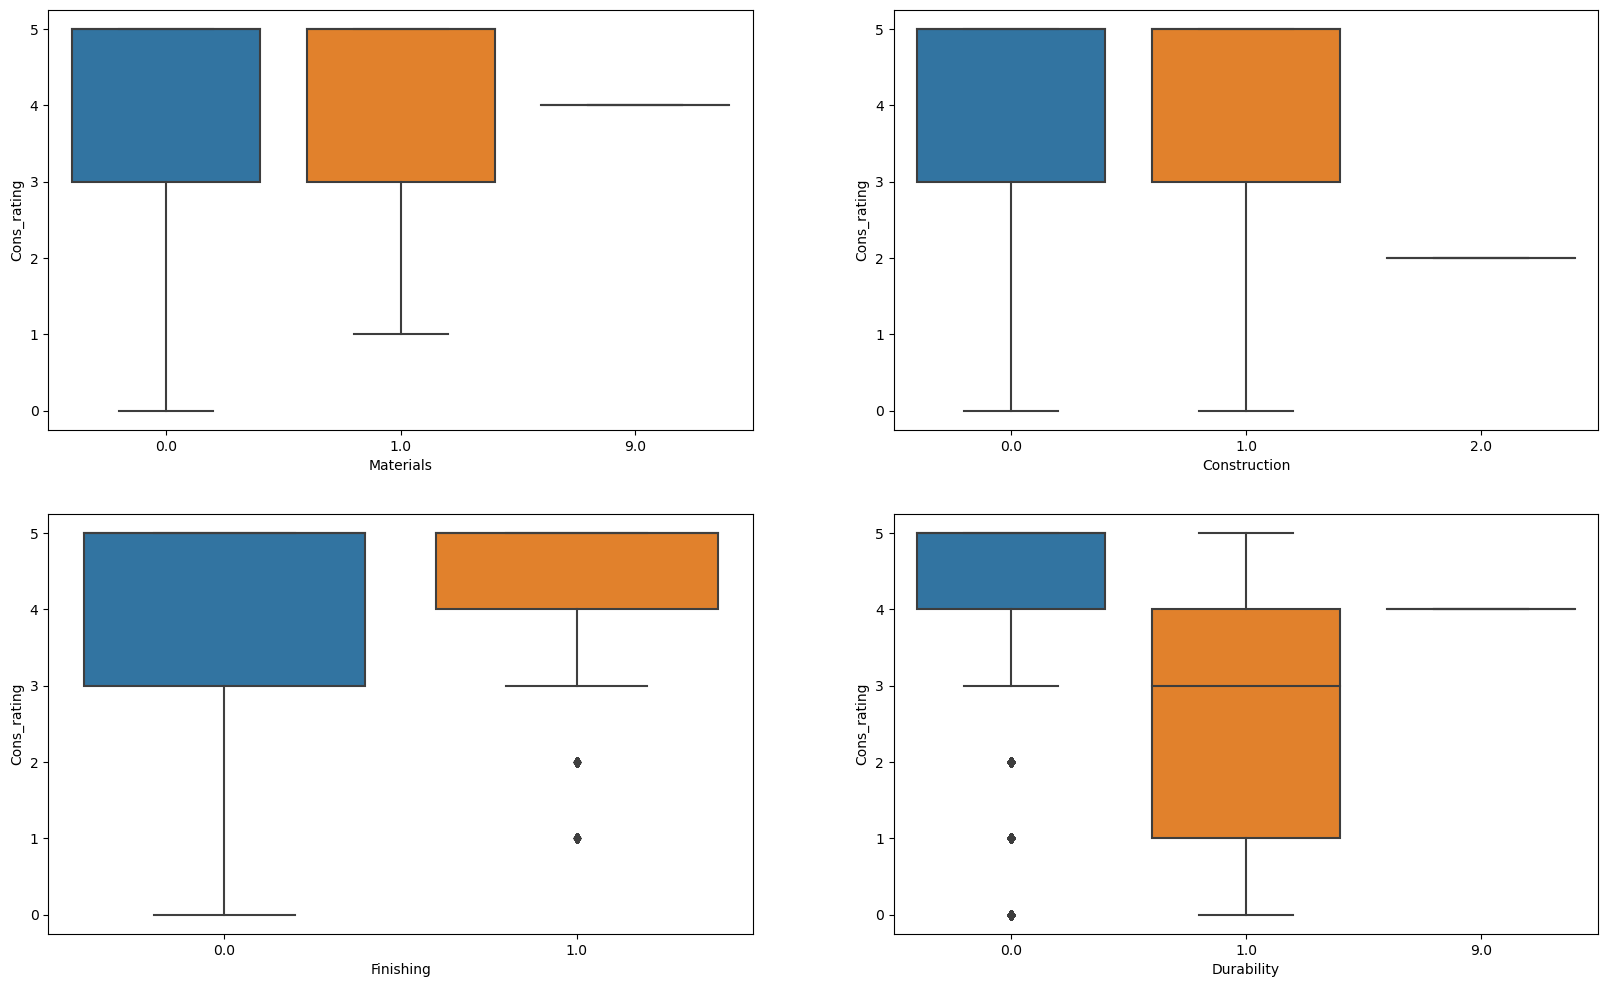

In [26]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'Materials', y = 'Cons_rating', data = df_cleared)
plt.subplot(2,2,2)
sns.boxplot(x = 'Construction', y = 'Cons_rating', data = df_cleared)
plt.subplot(2,2,3)
sns.boxplot(x = 'Finishing', y = 'Cons_rating', data = df_cleared)
plt.subplot(2,2,4)
sns.boxplot(x = 'Durability', y = 'Cons_rating', data = df_cleared)
plt.show()

### Lets prepare data for Topic modelling 

#### We are going to be working on Reviews column of datatable.

###### Steps:
* Text to lowercase
* Remove texts in brackets
* Remove punctuations
* Remove words containing more numbers
* Remove stop words
* Lemmatize the texts
* Extract the POS tags of the lemmatized text

In [27]:
def prep_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("\[.*?\]","",sentence)
    sentence = re.sub("[^\w\s]","",sentence)
    sentence = re.sub("\S*\d+\S*","",sentence)
    return sentence

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#!unzip /usr/personal/nltk_data/corpora/wordnet.zip -d /usr/personal/nltk_data/corpora/

#Fetching the pos of each word in a given sentence
def fetchPos(sentence):
    doc = nlp(sentence)
    word_Tags = {}
    for word in doc:
        if word.pos_ == "NOUN" or word.pos_ == "PROPN":
            word_Tags[word.text] = 'n'
        elif word.pos_ == "VERB" :
            word_Tags[word.text] = 'v'
        elif word.pos_ == "ADJ" :
            word_Tags[word.text] = 'a'
        elif word.pos_ == "ADV" :
            word_Tags[word.text] = 'r' 
        else :    
            word_Tags[word.text] = 'NA'
    return word_Tags
        

def lemmatizerFunc(sentence):
    wordNet_Lemma = WordNetLemmatizer()
    
    # replace multiple spaces with single space
    sentence = re.sub(r"\s+"," ",sentence)
    
    # get the pos of each word
    pos_tags = fetchPos(sentence)
    
    # tokenize into words
    words = word_tokenize(sentence)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    lemma_words = []
    for word in words:
        if word in pos_tags:
            pos = pos_tags[word]
            if pos != "NA":
                lemma_words.append(wordNet_Lemma.lemmatize(word, pos=pos))
        else :
            lemma_words.append(wordNet_Lemma.lemmatize(word))   

    # join words to make sentence
    document = " ".join(lemma_words)
    return document

In [29]:
#testing method with small text
test_text = "I upgraded my XXXX XXXX card in XX/XX/2018 and"

sent = prep_text(test_text)

print(lemmatizerFunc(sent))

upgrade xxxx xxxx card


In [30]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = df_cleared[['Review']].copy()

In [31]:
#creating a list of lemmatized text
from tqdm import tqdm
lemma_list = []
for sent in tqdm(df_clean.Review):
    lemma_list.append(lemmatizerFunc(prep_text(sent)))

100%|████████████████████████████████████| 48109/48109 [06:37<00:00, 120.88it/s]


In [32]:
list_series = pd.Series(lemma_list)
df_clean['Lemmatized_reviews'] = list_series.values

In [33]:
df_clean

,Review,Lemmatized_reviews
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store im gl...
2,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ti...
4,This shirt is very flattering to all due to th...,shirt flattering adjustable front tie perfect ...
...,...,...
49333,Loved the color!!! Dress fit great and I got ...,love color dress fit great get lot compliment ...
49334,This dress looked great and I loved the materi...,dress look great love material unfortunately f...
49335,Wanted this dress to work it didn't. It is ver...,want dress work didnt cute didnt finish zippin...
49336,No complaints othe than the zipper gets stuck ...,complaint othe zipper get stuck way n mess


In [34]:
# Write your code here to visualise the data according to the 'Complaint' character length
#len(df_clean["complaint_POS_removed"])
df_clean["text_length"] = df_clean.apply(lambda sent: len(sent.Lemmatized_reviews), axis=1)

In [35]:
df_clean

,Review,Lemmatized_reviews,text_length
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,43
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store im gl...,153
2,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...,287
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ti...,74
4,This shirt is very flattering to all due to th...,shirt flattering adjustable front tie perfect ...,106
...,...,...,...
49333,Loved the color!!! Dress fit great and I got ...,love color dress fit great get lot compliment ...,53
49334,This dress looked great and I loved the materi...,dress look great love material unfortunately f...,113
49335,Wanted this dress to work it didn't. It is ver...,want dress work didnt cute didnt finish zippin...,80
49336,No complaints othe than the zipper gets stuck ...,complaint othe zipper get stuck way n mess,42


In [36]:
df_clean["text_length"].describe()

count    48109.000000
mean       120.754142
std         93.274270
min          0.000000
25%         47.000000
50%         98.000000
75%        181.000000
max       1912.000000
Name: text_length, dtype: float64

#### The biggest review has around 1912 words. 
##### Looks like there are some rows with no words after lemmatization and removal of stop words

In [37]:
df_clean[df_clean["text_length"]==0]

,Review,Lemmatized_reviews,text_length
23470,na,,0
23667,💯,,0
23672,Like,,0
24630,Nothing,,0
25072,👏🏼👏🏼👏🏼☺️,,0
...,...,...,...
45798,😒,,0
46389,👎🏻,,0
46457,❤ 😍 💖 ❣,,0
46704,Myself,,0


In [38]:
df_clean = df_clean[df_clean["text_length"]!=0]

In [39]:
df_clean["text_length"].describe()

count    48024.000000
mean       120.967870
std         93.218204
min          1.000000
25%         47.000000
50%         99.000000
75%        181.000000
max       1912.000000
Name: text_length, dtype: float64

In [40]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


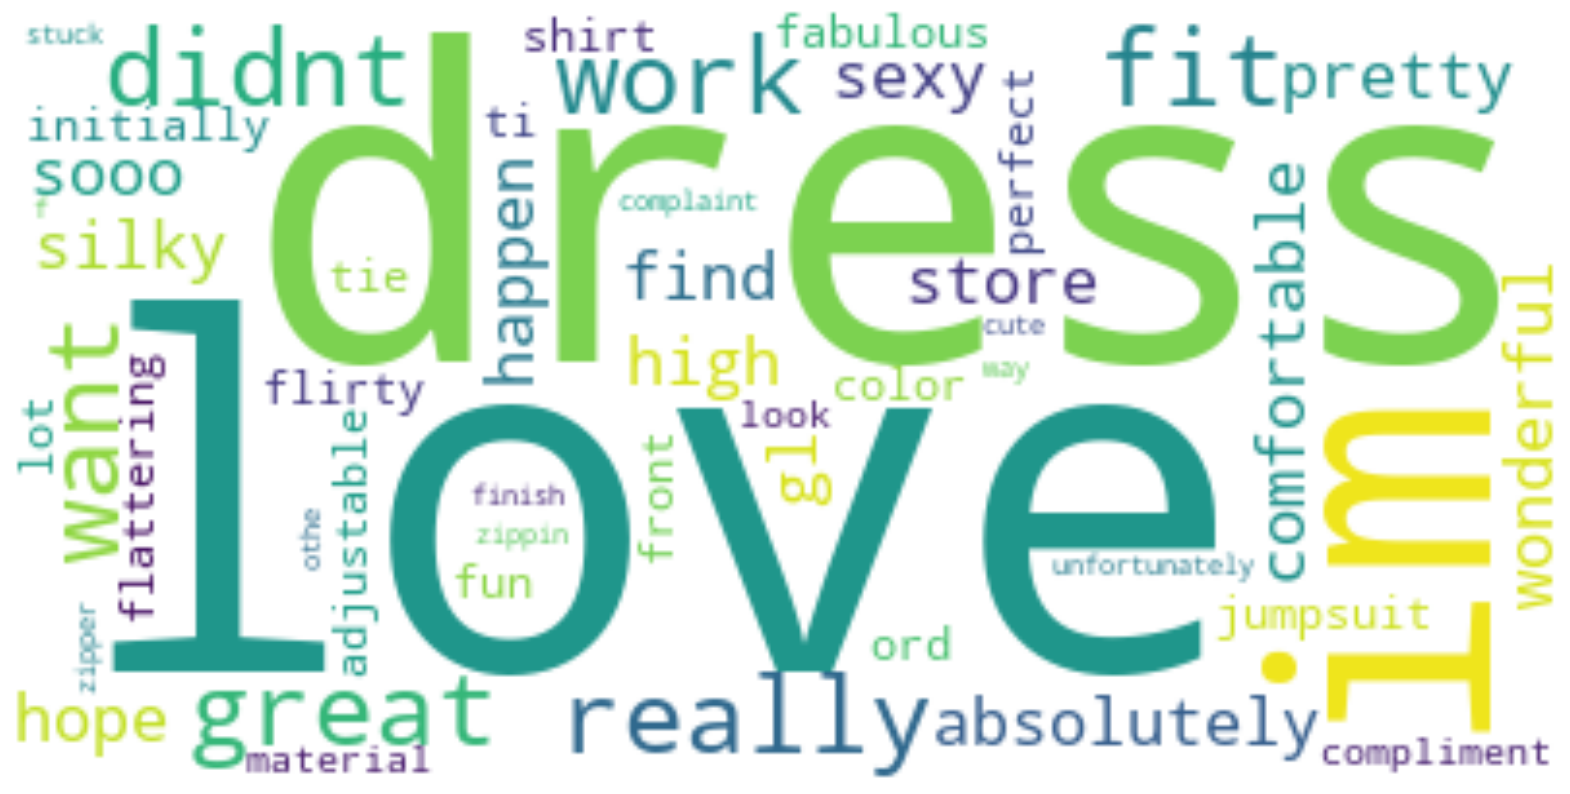

In [41]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud

sent = df_clean.Lemmatized_reviews

# Create and generate a word image:
wordcloud = WordCloud(max_words=50,  background_color="white" ).generate(str(sent))

# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
#Code to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 
from nltk.util import ngrams
def anygram(sentence, n):
    grams = ngrams(sentence.split(), n)
    return grams

In [43]:
def get_frequency(df,n):
    gram_freq = {}
    for sent in tqdm(df.Lemmatized_reviews):
        #found a sentence which had two words after clean up. So added this 'if' criteria.
        if len(sent.split())>n:
            n_grams = anygram(sent,n)
            for grms in n_grams:
                if grms not in gram_freq:
                    gram_freq[grms] = 1
                else:
                    gram_freq[grms] += 1
    return gram_freq  

In [44]:
#fetching unigrams
unigrams_list = get_frequency(df_clean,1)

100%|█████████████████████████████████| 48024/48024 [00:00<00:00, 131131.39it/s]


In [45]:
#Print the top 10 words in the unigram frequency
unigrams_sorted = sorted(unigrams_list.items(), key = lambda x: x[1], reverse=True)
unigrams_sorted[:10]

[(('fit',), 20574),
 (('size',), 15639),
 (('wear',), 15002),
 (('love',), 14763),
 (('dress',), 14513),
 (('look',), 13410),
 (('great',), 10579),
 (('color',), 10500),
 (('top',), 9394),
 (('order',), 8483)]

In [46]:
#Top 30 unigrams
unigrams_sorted[:30]

[(('fit',), 20574),
 (('size',), 15639),
 (('wear',), 15002),
 (('love',), 14763),
 (('dress',), 14513),
 (('look',), 13410),
 (('great',), 10579),
 (('color',), 10500),
 (('top',), 9394),
 (('order',), 8483),
 (('im',), 8374),
 (('buy',), 8208),
 (('get',), 7897),
 (('small',), 7740),
 (('fabric',), 6483),
 (('perfect',), 6469),
 (('comfortable',), 6366),
 (('good',), 6073),
 (('make',), 6064),
 (('well',), 5958),
 (('nice',), 5790),
 (('go',), 5732),
 (('short',), 5700),
 (('really',), 5617),
 (('little',), 5568),
 (('shirt',), 5532),
 (('material',), 5423),
 (('large',), 5305),
 (('soft',), 5304),
 (('quality',), 4724)]

In [47]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
bigrams_list = get_frequency(df_clean,2)
bigrams_sorted = sorted(bigrams_list.items(), key = lambda x: x[1], reverse=True)
bigrams_sorted[:30]

100%|██████████████████████████████████| 48024/48024 [00:00<00:00, 96518.82it/s]


[(('fit', 'perfectly'), 1804),
 (('true', 'size'), 1803),
 (('look', 'great'), 1438),
 (('fit', 'well'), 1363),
 (('fit', 'great'), 1303),
 (('love', 'dress'), 1100),
 (('order', 'size'), 1064),
 (('size', 'small'), 1013),
 (('fit', 'perfect'), 1010),
 (('size', 'fit'), 887),
 (('usually', 'wear'), 883),
 (('good', 'quality'), 838),
 (('well', 'make'), 834),
 (('run', 'small'), 812),
 (('look', 'good'), 773),
 (('make', 'look'), 727),
 (('love', 'top'), 696),
 (('run', 'large'), 671),
 (('fit', 'true'), 651),
 (('highly', 'recommend'), 644),
 (('love', 'color'), 632),
 (('go', 'back'), 600),
 (('soft', 'comfortable'), 595),
 (('really', 'like'), 589),
 (('great', 'fit'), 579),
 (('small', 'fit'), 577),
 (('light', 'weight'), 566),
 (('wear', 'size'), 561),
 (('im', 'lb'), 553),
 (('super', 'cute'), 551)]

In [48]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 
trigrams_list = get_frequency(df_clean,3)
trigrams_sorted = sorted(trigrams_list.items(), key = lambda x: x[1], reverse=True)
trigrams_sorted[:30]

100%|██████████████████████████████████| 48024/48024 [00:00<00:00, 94031.60it/s]


[(('fit', 'true', 'size'), 619),
 (('cant', 'wait', 'wear'), 243),
 (('run', 'true', 'size'), 242),
 (('receive', 'many', 'compliment'), 230),
 (('get', 'many', 'compliment'), 205),
 (('size', 'fit', 'perfectly'), 199),
 (('love', 'love', 'love'), 177),
 (('usually', 'wear', 'size'), 172),
 (('get', 'lot', 'compliment'), 162),
 (('small', 'fit', 'perfectly'), 160),
 (('order', 'usual', 'size'), 139),
 (('run', 'little', 'big'), 128),
 (('first', 'time', 'wear'), 126),
 (('run', 'little', 'large'), 124),
 (('size', 'small', 'fit'), 122),
 (('really', 'want', 'love'), 111),
 (('look', 'great', 'jean'), 110),
 (('run', 'little', 'small'), 110),
 (('medium', 'fit', 'perfectly'), 110),
 (('normally', 'wear', 'size'), 109),
 (('order', 'size', 'large'), 105),
 (('order', 'size', 'small'), 105),
 (('want', 'love', 'dress'), 103),
 (('look', 'forward', 'wear'), 103),
 (('pay', 'full', 'price'), 100),
 (('run', 'bit', 'large'), 93),
 (('usually', 'wear', 'medium'), 92),
 (('get', 'ton', 'compli

In [49]:
#Method to initialise the TfidfVectorizer 

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")

In [50]:
#Create the Document Term Matrix by transforming the reviews present in df_clean.
dtm = tfidf.fit_transform(df_clean.Lemmatized_reviews)

## Topic modelling

#### In this task we are performing the following:
* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

In [51]:
from sklearn.decomposition import NMF

In [52]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

In [53]:
nmf_model.fit(dtm)
len(tfidf.get_feature_names_out())

9372

In [54]:
H = nmf_model.components_
H

array([[5.76593622e-04, 1.76985684e-03, 8.65335554e-04, ...,
        0.00000000e+00, 3.84029555e-05, 0.00000000e+00],
       [1.43001715e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.01743939e-06],
       [2.28625782e-04, 0.00000000e+00, 0.00000000e+00, ...,
        7.23894739e-06, 0.00000000e+00, 2.87554390e-05],
       [2.55366602e-04, 0.00000000e+00, 0.00000000e+00, ...,
        2.36987065e-05, 0.00000000e+00, 0.00000000e+00],
       [8.69828584e-04, 2.76797327e-04, 1.43156011e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 10)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:10]
    topic_words.iloc[i] = words[ix]
    
topic_words   

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,size,small,order,large,run,im,wear,big,little,medium
Topic 2,fit,great,comfortable,perfect,perfectly,expect,jean,pant,soft,look
Topic 3,love,color,buy,soft,sweater,wear,shirt,comfortable,absolutely,comfy
Topic 4,good,quality,look,nice,material,price,shirt,product,expect,like
Topic 5,dress,wear,beautiful,look,flattering,fabric,make,im,perfect,compliment


In [56]:
#Write your function to extract the POS tags 
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize

def pos_tag(text):
    # write your code here
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

In [57]:
def remove_nonNN(text):
    pos_list = pos_tag(text)
    onlyNNList = []
    for word in pos_list:
        if word[1] == 'NN':
            onlyNNList.append(word[0])
    return " ".join(onlyNNList)


In [58]:
from tqdm import tqdm
remove_list = []
for sent in tqdm(df_clean.Lemmatized_reviews):
    remove_list.append(remove_nonNN(sent))

100%|███████████████████████████████████| 48024/48024 [00:44<00:00, 1080.60it/s]


In [59]:
df_clean["reviews_POS_removed"] =  pd.Series(remove_list).values

In [60]:
dtm = tfidf.fit_transform(df_clean.reviews_POS_removed)

nmf_model.fit(dtm)

H = nmf_model.components_

#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)

for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]
    
topic_words   

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,dress,im,summer,work,cute,wear,fabric,length,compliment,try,flatter,slip,purchase,fall,retailer
Topic 2,fit,perfect,right,length,medium,jacket,jean,order,product,im,pair,waist,pant,flattering,buy
Topic 3,size,order,medium,im,way,waist,return,length,try,review,bit,pair,purchase,stretch,run
Topic 4,color,love,quality,shirt,material,price,sweater,purchase,wear,work,buy,jacket,fabric,order,style
Topic 5,look,picture,jacket,way,jean,sweater,model,return,work,fabric,feel,try,im,person,didnt


In [61]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/personal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [63]:
def get_score(sentence):
    # Create a SentimentIntensityAnalyzer object
    sid = SentimentIntensityAnalyzer()
    # Get sentiment scores
    return sid.polarity_scores(sentence)

In [64]:
get_score("I love this top. it was cool on a summers day. i did get one of the strings of the design snagged but it worked out just fine, not ruined at all.")

{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.8474}

In [65]:
from tqdm import tqdm
score = []
for sent in tqdm(df_clean.Lemmatized_reviews):
       score.append(get_score(sent))

100%|████████████████████████████████████| 48024/48024 [03:45<00:00, 212.79it/s]


In [67]:
df_clean.head()

,Review,Lemmatized_reviews,text_length,reviews_POS_removed
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,43,sexy
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store im gl...,153,dress sooo store im glad bc order online bc bu...
2,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...,287,hope dress work order size fact zip reorder me...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ti...,74,love love jumpsuit fun time get compliment
4,This shirt is very flattering to all due to th...,shirt flattering adjustable front tie perfect ...,106,shirt tie length sleeveless pair shirt


In [68]:
final_score = []
for item in tqdm(score):
       if(item["neg"]==item["pos"] and item["neg"]==item["neu"]):
            final_score.append("neutral")
       elif(item["neg"]>item["pos"] and item["neg"]>item["neu"]):
            final_score.append("negative")
       elif(item["pos"]>item["neg"] and item["pos"]>item["neu"]):     
            final_score.append("positive")
       elif(item["neu"]>item["neg"] and item["neu"]>item["pos"]):
            final_score.append("neutral")
       else:
            final_score.append("neutral")

100%|█████████████████████████████████| 48024/48024 [00:00<00:00, 496839.69it/s]


In [69]:
len(final_score)

48024

In [70]:
df_clean["score"] =  pd.Series(final_score).values

In [71]:
df_clean.head()

,Review,Lemmatized_reviews,text_length,reviews_POS_removed,score
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,43,sexy,positive
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store im gl...,153,dress sooo store im glad bc order online bc bu...,positive
2,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...,287,hope dress work order size fact zip reorder me...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ti...,74,love love jumpsuit fun time get compliment,positive
4,This shirt is very flattering to all due to th...,shirt flattering adjustable front tie perfect ...,106,shirt tie length sleeveless pair shirt,positive


### Ratings vs Review scores

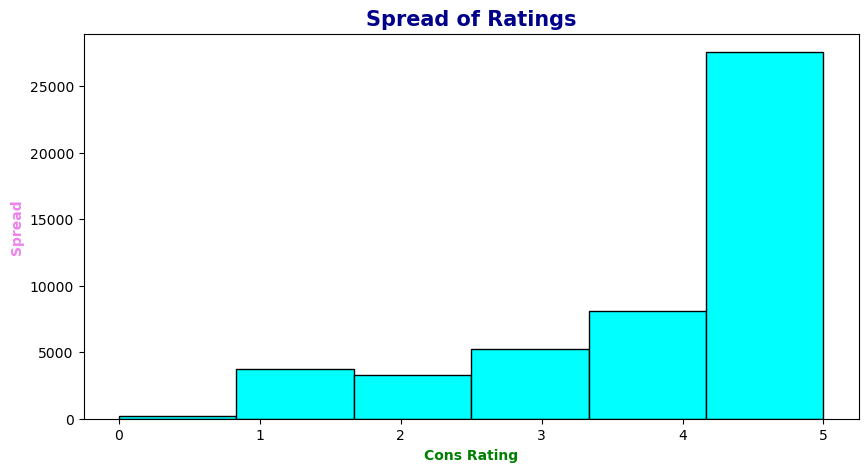

In [72]:
plt.figure(figsize=(10, 5))
plt.hist(df_cleared.Cons_rating, bins = 6, edgecolor='black', color='cyan')
plt.title('Spread of Ratings', fontsize = 15, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Cons Rating', fontsize = 10, fontweight = 'bold', color = 'green')
plt.ylabel('Spread', fontsize = 10, fontweight = 'bold', color = 'violet')
plt.show()

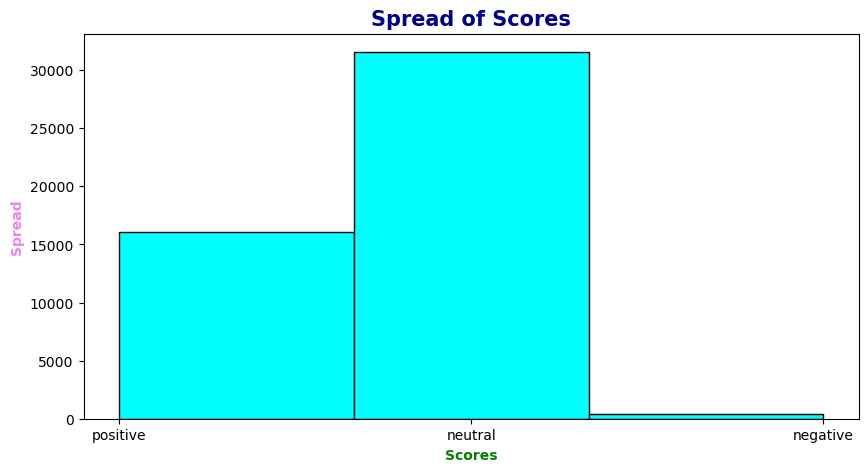

In [73]:
plt.figure(figsize=(10, 5))
plt.hist(df_clean.score, bins = 3, edgecolor='black', color='cyan')
plt.title('Spread of Scores', fontsize = 15, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Scores', fontsize = 10, fontweight = 'bold', color = 'green')
plt.ylabel('Spread', fontsize = 10, fontweight = 'bold', color = 'violet')
plt.show()

#### Looking at the charts, the ratings and the review sentiment scores dont seem to be matching. There are more 5 ratings than any other but the review sentiment score show neutral sentiment more.

Lets try feeding the reviews directly instead of Lemmatized reviews.

In [74]:
from tqdm import tqdm
score_review = []
for sent in tqdm(df_clean.Review):
       score_review.append(get_score(sent))

100%|████████████████████████████████████| 48024/48024 [03:55<00:00, 203.82it/s]


In [75]:
review_score = []
for item in tqdm(score_review):
       if(item["neg"]==item["pos"] and item["neg"]==item["neu"]):
            review_score.append("neutral")
       elif(item["neg"]>item["pos"] and item["neg"]>item["neu"]):
            review_score.append("negative")
       elif(item["pos"]>item["neg"] and item["pos"]>item["neu"]):     
            review_score.append("positive")
       elif(item["neu"]>item["neg"] and item["neu"]>item["pos"]):
            review_score.append("neutral")
       else:
            review_score.append("neutral")

100%|█████████████████████████████████| 48024/48024 [00:00<00:00, 731927.77it/s]


In [76]:
df_clean["review_score"] =  pd.Series(review_score).values

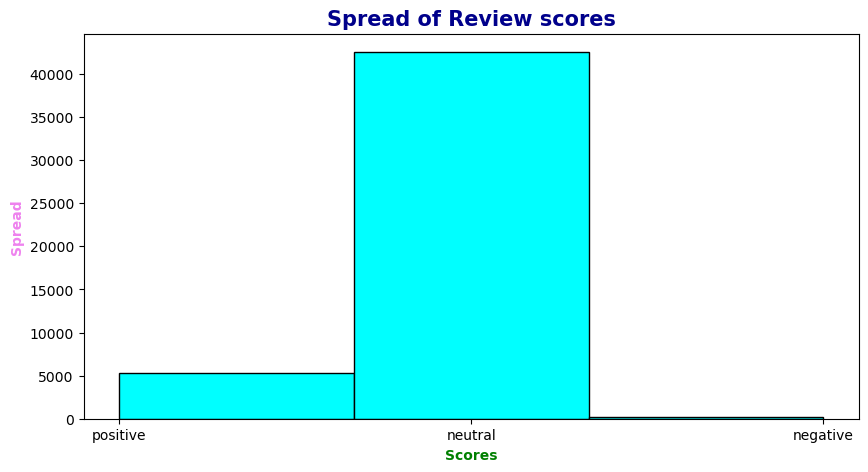

In [78]:
plt.figure(figsize=(10, 5))
plt.hist(df_clean.review_score, bins = 3, edgecolor='black', color='cyan')
plt.title('Spread of Review scores', fontsize = 15, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Scores', fontsize = 10, fontweight = 'bold', color = 'green')
plt.ylabel('Spread', fontsize = 10, fontweight = 'bold', color = 'violet')
plt.show()

#### Lets try the same with reviews pos removed.

In [79]:
from tqdm import tqdm
score_pos = []
for sent in tqdm(df_clean.reviews_POS_removed):
       score_pos.append(get_score(sent))

100%|████████████████████████████████████| 48024/48024 [04:01<00:00, 198.96it/s]


In [80]:
pos_score = []
for item in tqdm(score_pos):
       if(item["neg"]==item["pos"] and item["neg"]==item["neu"]):
            pos_score.append("neutral")
       elif(item["neg"]>item["pos"] and item["neg"]>item["neu"]):
            pos_score.append("negative")
       elif(item["pos"]>item["neg"] and item["pos"]>item["neu"]):     
            pos_score.append("positive")
       elif(item["neu"]>item["neg"] and item["neu"]>item["pos"]):
            pos_score.append("neutral")
       else:
            pos_score.append("neutral")

100%|█████████████████████████████████| 48024/48024 [00:00<00:00, 234665.24it/s]


In [81]:
df_clean["pos_score"] =  pd.Series(pos_score).values

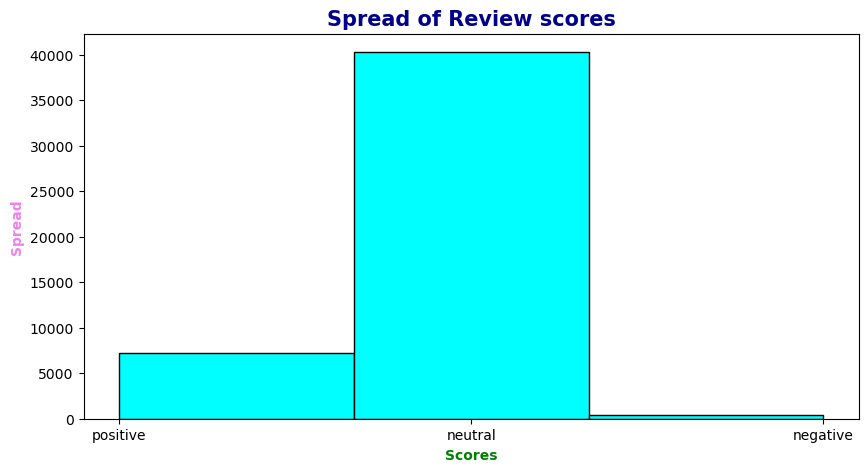

In [82]:
plt.figure(figsize=(10, 5))
plt.hist(df_clean.pos_score, bins = 3, edgecolor='black', color='cyan')
plt.title('Spread of Review scores', fontsize = 15, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Scores', fontsize = 10, fontweight = 'bold', color = 'green')
plt.ylabel('Spread', fontsize = 10, fontweight = 'bold', color = 'violet')
plt.show()